# Setup & Load data

In [15]:
import sys
import os
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from src.models import LogisticRegressionCustom,load_csv,split_data,cross_val_score_custom,print_table
from src.visualization import plot_confusion_matrix

In [16]:
data,col_names = load_csv('../data/processed/aug_train.csv')
X = data[:,:-1].astype(float)
y = data[:,-1].astype(float)
X_train,X_valid,y_train,y_valid = split_data(X, y, test_size=0.2, random_state=42,stratify=y)
res = []
print(f"Kích thước dữ liệu gốc - X: {X.shape}, y: {y.shape}")
print(f"Train X: {X_train.shape}, y: {y_train.shape}")
print(f"Test  X: {X_valid.shape}, y: {y_valid.shape}")
print(f"Tỷ lệ nghỉ việc (Train): {np.mean(y_train):.2%}")
print(f"Tỷ lệ nghỉ việc (Validation):  {np.mean(y_valid):.2%}")

Kích thước dữ liệu gốc - X: (19158, 13), y: (19158,)
Train X: (15327, 13), y: (15327,)
Test  X: (3831, 13), y: (3831,)
Tỷ lệ nghỉ việc (Train): 24.94%
Tỷ lệ nghỉ việc (Validation):  24.93%


# Logistic Regression

In [17]:
model_cv = LogisticRegressionCustom(
    alpha=0.05,
    num_iters=5000,
    lambda_=0.007,
    verbose = False
)
scores, mean_f1 = cross_val_score_custom(
    model_cv, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='f1', 
)


Bắt đầu 5-Fold Cross Validation...
Iteration  4999 | Cost: 0.574295 |
Fold 1/5: f1 = 0.6060
Iteration  4999 | Cost: 0.572686 |
Fold 2/5: f1 = 0.5969
Iteration  4999 | Cost: 0.577650 |
Fold 3/5: f1 = 0.5719
Iteration  4999 | Cost: 0.571766 |
Fold 4/5: f1 = 0.5894
Iteration  4999 | Cost: 0.572209 |
Fold 5/5: f1 = 0.5462
------------------------------
Average f1: 0.5821 (+/- 0.0212)


Iteration     0 | Cost: 0.686518 |
Iteration   500 | Cost: 0.574225 |
Iteration  1000 | Cost: 0.573961 |
Iteration  1500 | Cost: 0.573874 |
Iteration  2000 | Cost: 0.573842 |
Iteration  2500 | Cost: 0.573831 |
Iteration  3000 | Cost: 0.573827 |
Iteration  3500 | Cost: 0.573825 |
Iteration  4000 | Cost: 0.573825 |
Iteration  4500 | Cost: 0.573825 |
Iteration  4999 | Cost: 0.573825 |


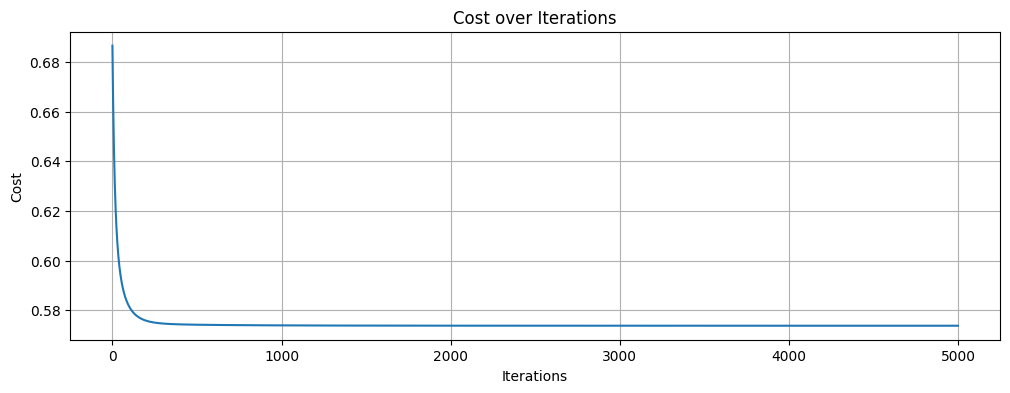

--------------------
Đánh giá mô hình: 
Accuracy: 0.755
F1: 0.561
Precision: 0.508
Recall: 0.626
Auc: 0.758


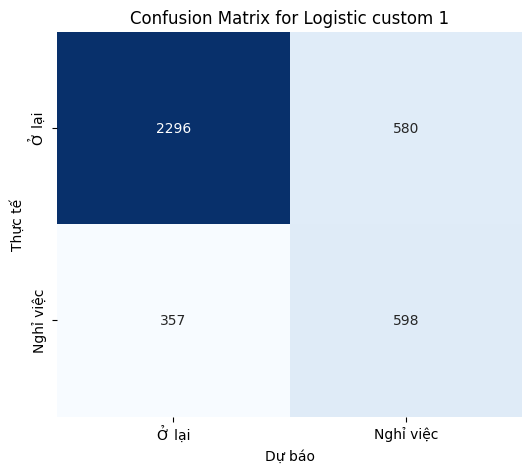

In [18]:
lg1 = LogisticRegressionCustom(alpha=0.05,
    num_iters=5000,
    lambda_=0.009,
)
lg1.fit(X_train,y_train)
lg1.plot()
print('-' * 20)
print("Đánh giá mô hình: ")
metric = lg1.score(X_valid,y_valid)
metric["model"] = 'Logistic custom 1'
print(f'Accuracy: {metric["accuracy"]:.3f}')
print(f'F1: {metric["f1"]:.3f}')
print(f'Precision: {metric["precision"]:.3f}')
print(f'Recall: {metric["recall"]:>.3f}')
print(f'Auc: {metric["auc"]:.3f}')
plot_confusion_matrix(y_valid,lg1.predict(X_valid),metric["model"])
res.append(metric)

Iteration     0 | Cost: 0.682866 |
Iteration   500 | Cost: 0.559890 |
Iteration  1000 | Cost: 0.556212 |
Iteration  1500 | Cost: 0.555531 |
Iteration  2000 | Cost: 0.555355 |
Iteration  2500 | Cost: 0.555297 |
Iteration  3000 | Cost: 0.555273 |
Iteration  3500 | Cost: 0.555261 |
Iteration  4000 | Cost: 0.555254 |
Iteration  4500 | Cost: 0.555250 |
Iteration  4999 | Cost: 0.555247 |


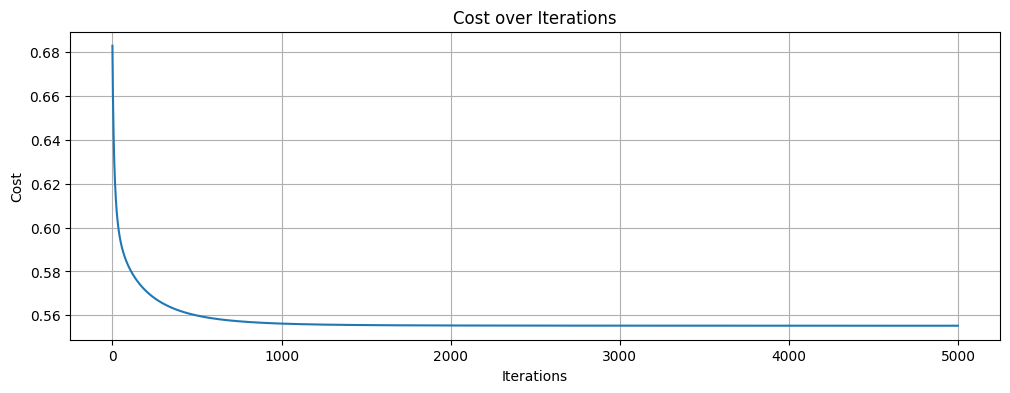

--------------------
Đánh giá mô hình: 
Accuracy: 0.752
F1: 0.587
Precision: 0.502
Recall: 0.707
Auc: 0.771


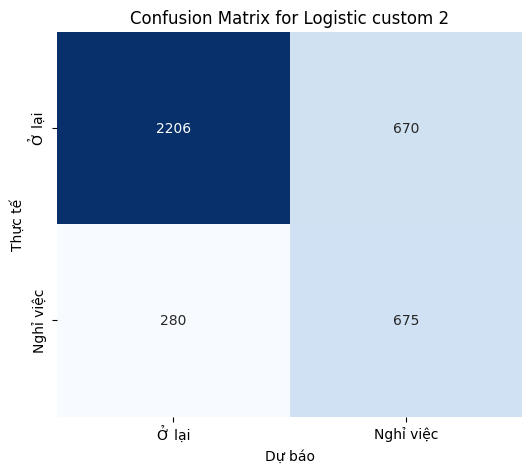

In [19]:
X_poly = np.column_stack((X_train,X_train ** 2))
X_ply_valid = np.column_stack((X_valid,X_valid ** 2))
lg2 = LogisticRegressionCustom(alpha=0.03,
    num_iters=5000,
    lambda_=0.005,
)

lg2.fit(X_poly,y_train)
lg2.plot()
print('-' * 20)
print("Đánh giá mô hình: ")
metric = lg2.score(X_ply_valid,y_valid)
metric["model"] = 'Logistic custom 2'
print(f'Accuracy: {metric["accuracy"]:.3f}')
print(f'F1: {metric["f1"]:.3f}')
print(f'Precision: {metric["precision"]:.3f}')
print(f'Recall: {metric["recall"]:>.3f}')
print(f'Auc: {metric["auc"]:.3f}')
plot_confusion_matrix(y_valid,lg2.predict(X_ply_valid),metric["model"])
res.append(metric)

# Model có sẵn

1. Huấn luyện Logistic Regression 
2. Huấn luyện Random Forest


KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH
----------------------------------------------------------------------------------
| Tên mô hình             |  Accuracy| Precision|    Recall|  F1-Score|       AUC|
----------------------------------------------------------------------------------
| Logistic Regression     |    0.7554|    0.5076|    0.6262|    0.5607|    0.7576|
| Random Forest           |    0.8003|    0.5906|    0.6482|    0.6181|    0.7880|
----------------------------------------------------------------------------------



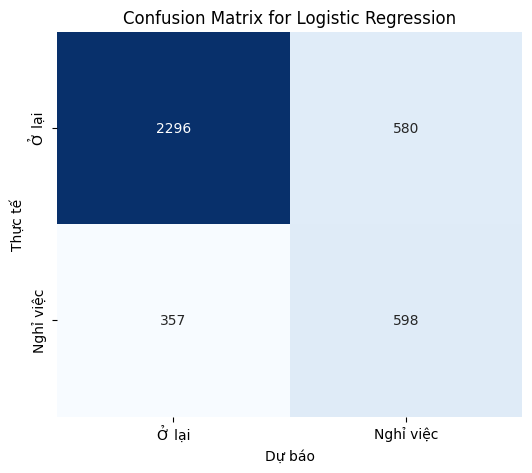

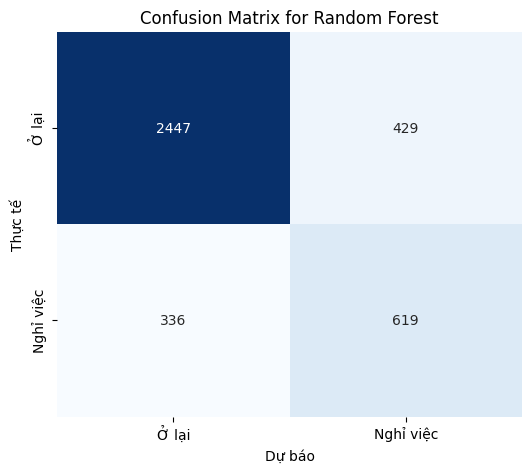

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, 
)


tmp = []

print("1. Huấn luyện Logistic Regression ")

logreg = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    max_iter=5000,
)

logreg.fit(X_train, y_train)
prob_log = logreg.predict_proba(X_valid)[:, 1]


prec, rec, thr = precision_recall_curve(y_valid, prob_log)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1s)
best_thr_log = thr[best_idx]
y_pred_log = (prob_log >= best_thr_log).astype(int)

log_metrics = {
    "model": "Logistic Regression",
    "accuracy":  accuracy_score(y_valid, y_pred_log),
    "precision": precision_score(y_valid, y_pred_log),
    "recall":    recall_score(y_valid, y_pred_log),
    "f1":  f1_score(y_valid, y_pred_log),
    "auc":       roc_auc_score(y_valid, prob_log),
}
tmp.append(log_metrics)



print("2. Huấn luyện Random Forest\n")

rf = RandomForestClassifier(
    n_estimators=1500,
    max_depth=14,
    min_samples_split=6,
    min_samples_leaf=3,
    class_weight='balanced_subsample',
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
prob_rf = rf.predict_proba(X_valid)[:, 1]

# Tìm threshold tối ưu theo F1
prec, rec, thr = precision_recall_curve(y_valid, prob_rf)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1s)
best_thr_rf = thr[best_idx]
y_pred_rf = (prob_rf >= best_thr_rf).astype(int)

rf_metrics = {
    "model": "Random Forest",
    "accuracy":  accuracy_score(y_valid, y_pred_rf),
    "precision": precision_score(y_valid, y_pred_rf),
    "recall":    recall_score(y_valid, y_pred_rf),
    "f1":  f1_score(y_valid, y_pred_rf),
    "auc":       roc_auc_score(y_valid, prob_rf),
}
tmp.append(rf_metrics)

print_table(tmp)


plot_confusion_matrix(y_valid,y_pred_log,'Logistic Regression')
plot_confusion_matrix(y_valid,y_pred_rf,'Random Forest')
res.extend(tmp)

# Tổng kết

In [21]:
print_table(res)


KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH
----------------------------------------------------------------------------------
| Tên mô hình             |  Accuracy| Precision|    Recall|  F1-Score|       AUC|
----------------------------------------------------------------------------------
| Logistic custom 1       |    0.7554|    0.5076|    0.6262|    0.5607|    0.7576|
| Logistic custom 2       |    0.7520|    0.5019|    0.7068|    0.5870|    0.7710|
| Logistic Regression     |    0.7554|    0.5076|    0.6262|    0.5607|    0.7576|
| Random Forest           |    0.8003|    0.5906|    0.6482|    0.6181|    0.7880|
----------------------------------------------------------------------------------



**1. Thuật toán tự xây dựng**  
- Logistic Regression tự viết (Custom 1) cho kết quả **giống** với `sklearn.LogisticRegression` .  
→ Chứng minh phần triển khai Gradient Descent, L2 regularization và xử lý class imbalance **hoàn toàn chính xác và đạt chuẩn thư viện**.

**2. Linh hoạt điều chỉnh theo mục tiêu kinh doanh**  
- Phiên bản **Custom 2** (tinh chỉnh trọng số lớp) đạt **Recall cao nhất toàn dự án: 70.68%**, vượt trội cả Random Forest.  
→ Trong kịch bản ưu tiên **“không bỏ sót nhân viên có nguy cơ nghỉ việc”**, mô hình tự viết này là lựa chọn tối ưu nhất.

**3. Random Forest vẫn là mô hình mạnh nhất tổng thể**  
| Tiêu chí          | Logistic (tốt nhất) | Random Forest |  
|-------------------|---------------------|---------------|  
| F1-Score          | 0.5870              | 0.6181        |  
| Precision         | ~0.50               | 0.5906        |  
| AUC               | 0.7710              | 0.7880        |  
